Extracting parameters from session1_sub10_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 5389799  =      0.000 ...  2155.920 secs...
Using matplotlib as 2D backend.


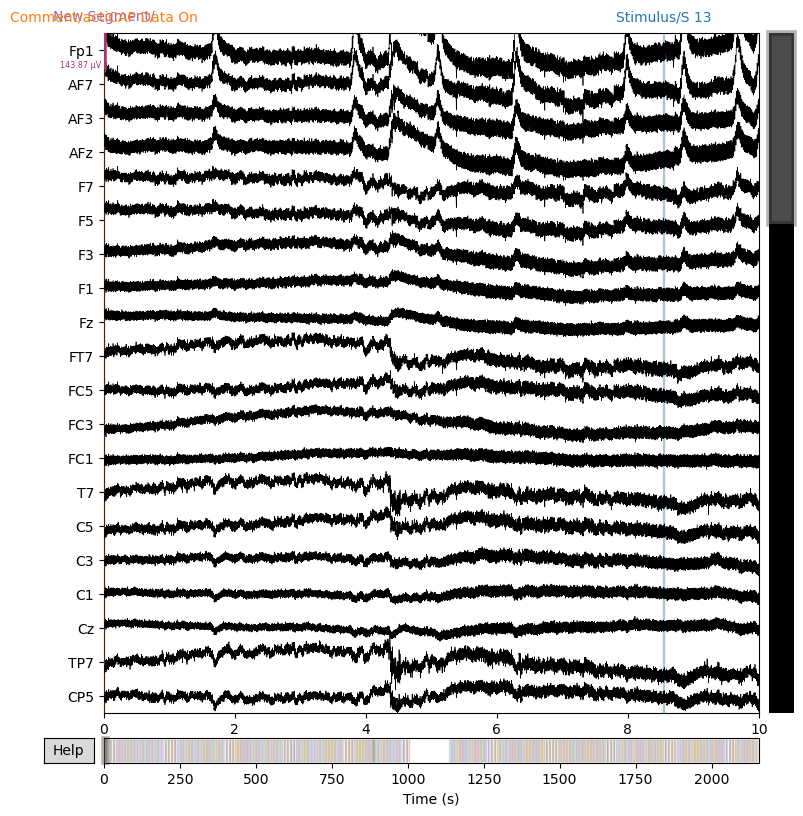

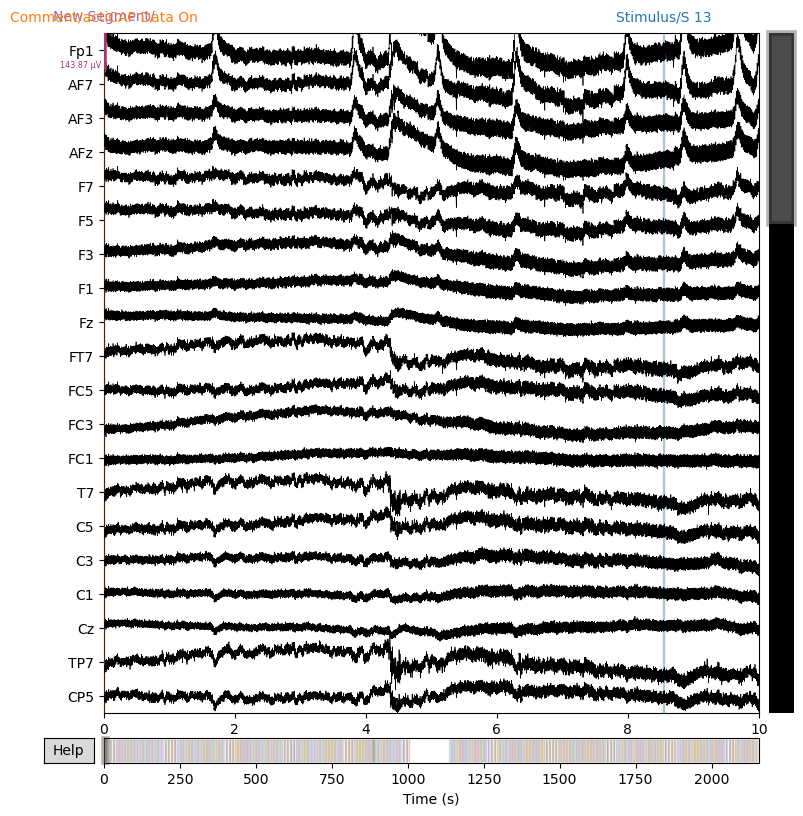

In [ ]:
import mne

# Replace with the correct path to your .vhdr file
vhdr_path = "session1_sub10_twist_MI.vhdr"

# Load the data
raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)

# Plot raw EEG
raw.plot(n_channels=20, scalings='auto')


In [ ]:
# Extract events from the marker file
events, event_id = mne.events_from_annotations(raw)

# Visualize the events
print(event_id)      # Dictionary of event labels and IDs
print(events[:10])   # First few events (onset time, 0, event ID)


Used Annotations descriptions: ['Comment/ControlBox is not connected via USB', 'Comment/actiCAP Data On', 'Comment/actiCAP USB Power On', 'New Segment/', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 91', 'Stimulus/S101', 'Stimulus/S111', 'Stimulus/S121']
{'Comment/ControlBox is not connected via USB': 10001, 'Comment/actiCAP Data On': 10002, 'Comment/actiCAP USB Power On': 10003, 'New Segment/': 99999, 'Stimulus/S  8': 8, 'Stimulus/S  9': 9, 'Stimulus/S 10': 10, 'Stimulus/S 11': 11, 'Stimulus/S 12': 12, 'Stimulus/S 13': 13, 'Stimulus/S 14': 14, 'Stimulus/S 91': 91, 'Stimulus/S101': 101, 'Stimulus/S111': 111, 'Stimulus/S121': 121}
[[    0     0 99999]
 [    0     0 10002]
 [21358     0    13]
 [28914     0    12]
 [36429     0   121]
 [46473     0     8]
 [54041     0    11]
 [61553     0   111]
 [71593     0     8]
 [79161     0     9]]


In [ ]:

# Extract annotations (i.e., event labels)
annotations = raw.annotations

# Display all annotations
print(annotations)


<Annotations | 606 segments: Comment/ControlBox is not connected via USB ...>


In [ ]:
# Convert annotations to events
events, event_id = mne.events_from_annotations(raw)

# Show available events
print("Event ID mapping:", event_id)


Used Annotations descriptions: ['Comment/ControlBox is not connected via USB', 'Comment/actiCAP Data On', 'Comment/actiCAP USB Power On', 'New Segment/', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 91', 'Stimulus/S101', 'Stimulus/S111', 'Stimulus/S121']
Event ID mapping: {'Comment/ControlBox is not connected via USB': 10001, 'Comment/actiCAP Data On': 10002, 'Comment/actiCAP USB Power On': 10003, 'New Segment/': 99999, 'Stimulus/S  8': 8, 'Stimulus/S  9': 9, 'Stimulus/S 10': 10, 'Stimulus/S 11': 11, 'Stimulus/S 12': 12, 'Stimulus/S 13': 13, 'Stimulus/S 14': 14, 'Stimulus/S 91': 91, 'Stimulus/S101': 101, 'Stimulus/S111': 111, 'Stimulus/S121': 121}


In [ ]:
# Extract annotations (this includes 'S91', 'S101', etc.)
annotations = raw.annotations
print(annotations[:5])  # View the first few annotations


<Annotations | 5 segments: Comment/actiCAP Data On (1), New Segment/ (1), ...>


In [ ]:
events, event_id = mne.events_from_annotations(raw)
print("Event ID mapping:", event_id)


Used Annotations descriptions: ['Comment/ControlBox is not connected via USB', 'Comment/actiCAP Data On', 'Comment/actiCAP USB Power On', 'New Segment/', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 91', 'Stimulus/S101', 'Stimulus/S111', 'Stimulus/S121']
Event ID mapping: {'Comment/ControlBox is not connected via USB': 10001, 'Comment/actiCAP Data On': 10002, 'Comment/actiCAP USB Power On': 10003, 'New Segment/': 99999, 'Stimulus/S  8': 8, 'Stimulus/S  9': 9, 'Stimulus/S 10': 10, 'Stimulus/S 11': 11, 'Stimulus/S 12': 12, 'Stimulus/S 13': 13, 'Stimulus/S 14': 14, 'Stimulus/S 91': 91, 'Stimulus/S101': 101, 'Stimulus/S111': 111, 'Stimulus/S121': 121}


In [ ]:
# Define event ID map for classification
wrist_events = {'pronation': 91, 'supination': 101}

# Create epochs around these wrist events
epochs = mne.Epochs(raw, events, event_id=wrist_events, tmin=-0.2, tmax=1.0,
                    baseline=(None, 0), preload=True)


Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


In [ ]:
# Extract features and labels
X = epochs.get_data()       # shape: (n_trials, n_channels, n_times)
y = epochs.events[:, 2]     # event IDs: 91 or 101

# Optional: remap labels to 0 and 1
import numpy as np
y_binary = np.where(y == 91, 0, 1)  # 0 = pronation, 1 = supination


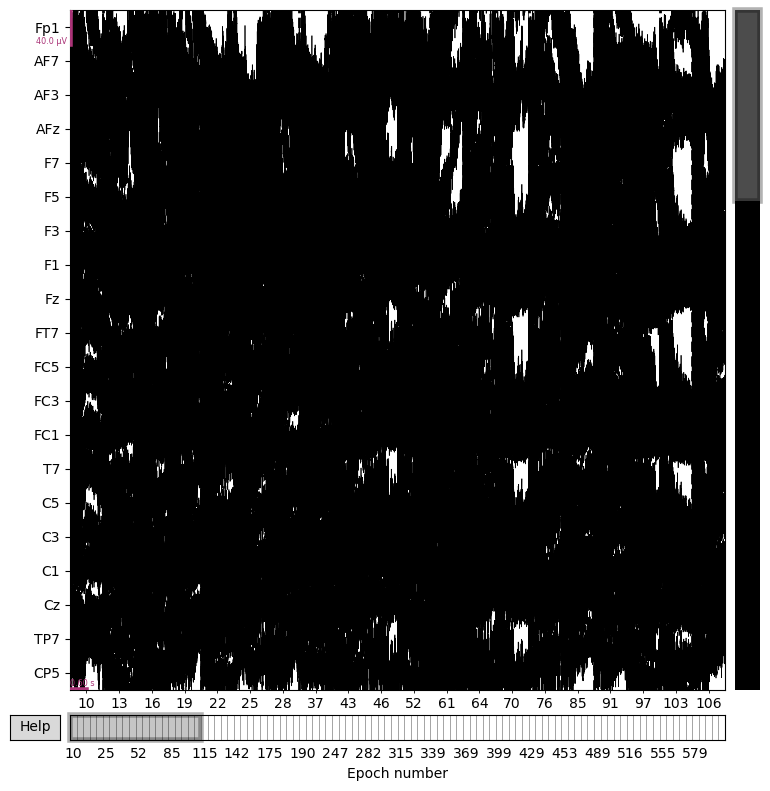

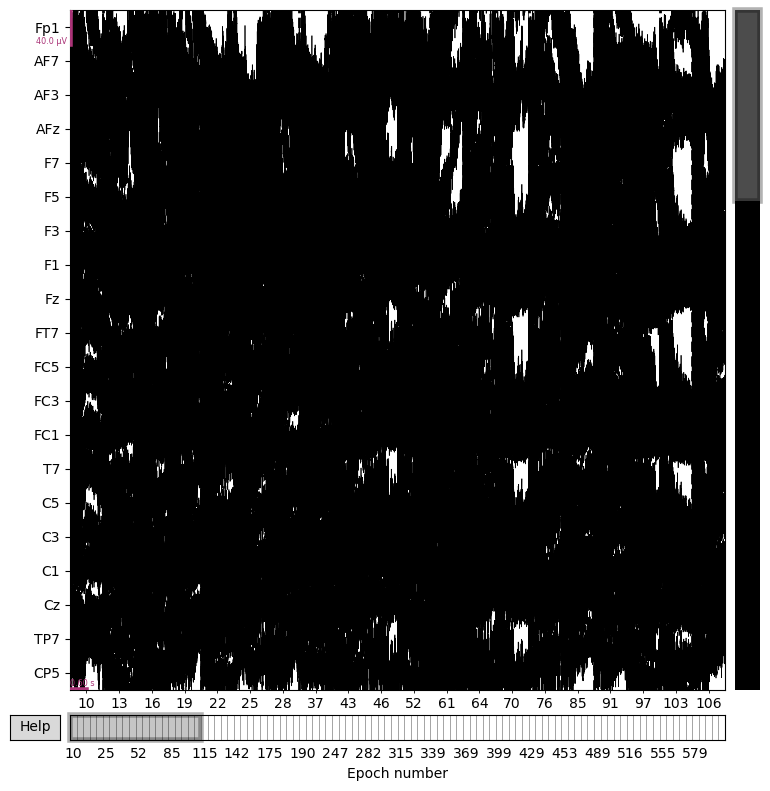

In [ ]:
#Plot raw EEG traces for all wrist movement trials
epochs.plot(n_channels=20, title="All wrist MI epochs (pronation + supination)")


/var/folders/dp/24dy134d3_j36jrflqn8t1hw0000gn/T/ipykernel_59628/3502056290.py:12: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


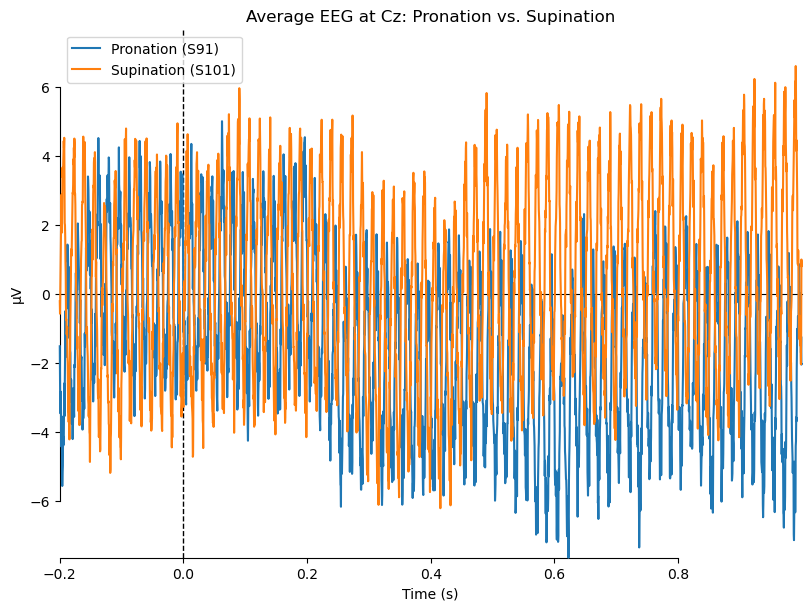

[<Figure size 800x600 with 1 Axes>]

In [ ]:
#Plot averaged waveform (Evoked response) for each class

# Separate epochs by label
epochs_pronation = epochs['pronation']
epochs_supination = epochs['supination']

# Get average (Evoked object)
evoked_pronation = epochs_pronation.average()
evoked_supination = epochs_supination.average()

# Plot both on same figure
mne.viz.plot_compare_evokeds(
    {"Pronation (S91)": evoked_pronation, "Supination (S101)": evoked_supination},
    picks='Cz', title="Average EEG at Cz: Pronation vs. Supination"
)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 16501 samples (6.600 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   16.7s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8251 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   20.5s finished


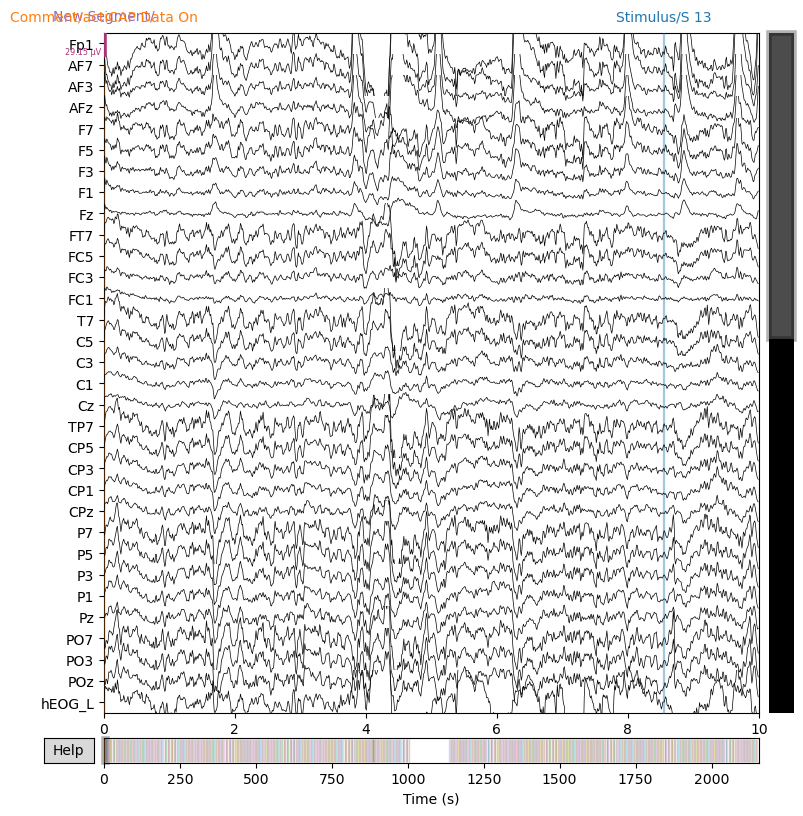

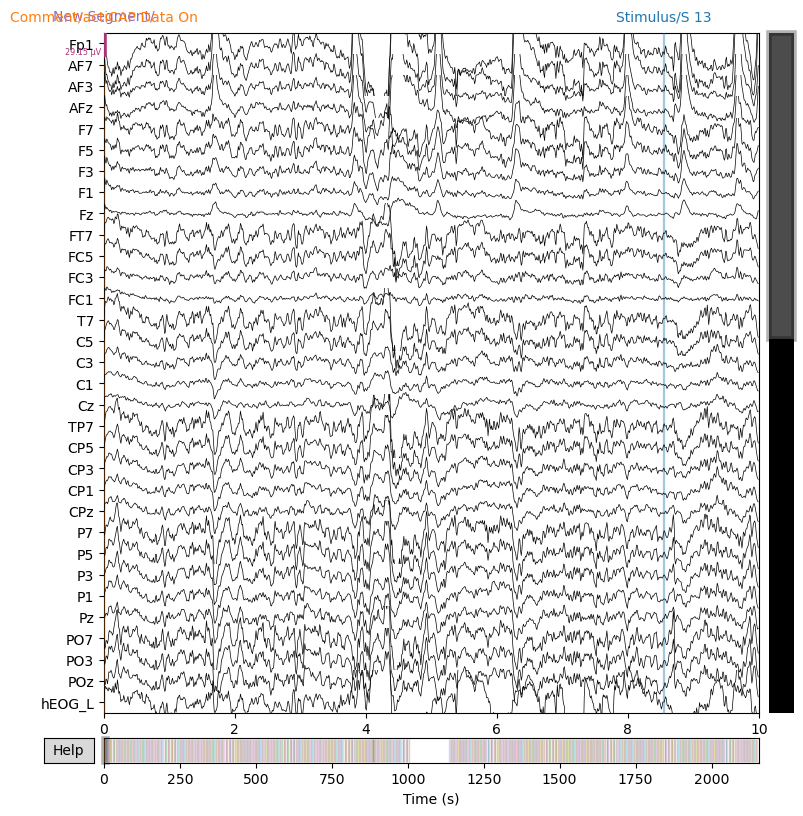

In [ ]:
#PREPROCESSING

#Set Standard EEG Montage
#raw.set_montage("standard_1020")

#Apply Notch Filter (remove 60Hz power line noise)
raw.notch_filter(freqs=60)

#Bandpass Filter (keep 1–30 Hz MI-relevant frequencies)
raw.filter(l_freq=1, h_freq=30)

#Plot Raw EEG to Visually Check for Artifacts (Optional)
raw.plot(n_channels=32, duration=10, scalings='auto')


In [ ]:
#Artifact Removal via ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=42)
ica.fit(raw)
ica.exclude = [...]  # based on visual or auto EOG detection
raw = ica.apply(raw)


Fitting ICA to data using 71 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 350.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 71 PCA components


In [ ]:
#Epoching based on annotations
events, event_id = mne.events_from_annotations(raw)
event_id = {'pronation': 91, 'supination': 101}
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=1.0, baseline=(None, 0), preload=True)


Used Annotations descriptions: ['Comment/ControlBox is not connected via USB', 'Comment/actiCAP Data On', 'Comment/actiCAP USB Power On', 'New Segment/', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 91', 'Stimulus/S101', 'Stimulus/S111', 'Stimulus/S121']
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


In [ ]:
#FEATURE EXTRACTION AND CLASSIFICATION

#Option 1: CSP + Traditional ML Models
from mne.decoding import CSP
from sklearn.model_selection import train_test_split

#Extract data
X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
y = (epochs.events[:, 2] == 101).astype(int)  # 91 or 101 → convert to 0/1, 0: pronation, 1: supination


csp = CSP(n_components=6, log=True, norm_trace=False)
X_csp = csp.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_csp, y, test_size=0.2, random_state=42)


Computing rank from data with rank=None
    Using tolerance 0.0013 (2.2e-16 eps * 71 dim * 8.3e+10  max singular value)
    Estimated rank (data): 71
    data: rank 71 computed from 71 data channels with 0 projectors
Reducing data rank from 71 -> 71
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.


In [ ]:
#ML Models

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='rbf', probability=True),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n--- {name} Evaluation ---")
    print(classification_report(y_test, y_pred))


--- LDA Evaluation ---
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20


--- SVM Evaluation ---
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20


--- RF Evaluation ---
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
wei


--- LDA Evaluation ---
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



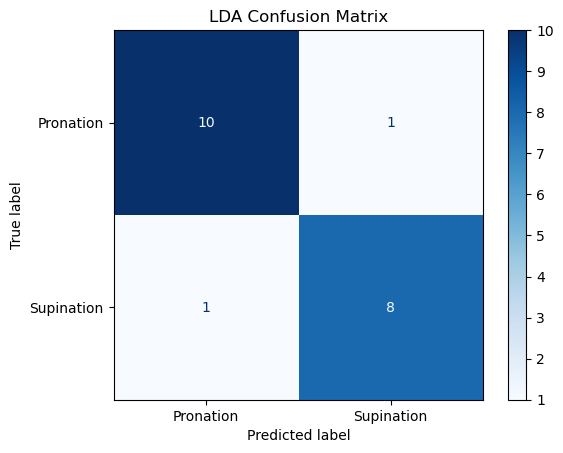


--- SVM Evaluation ---
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



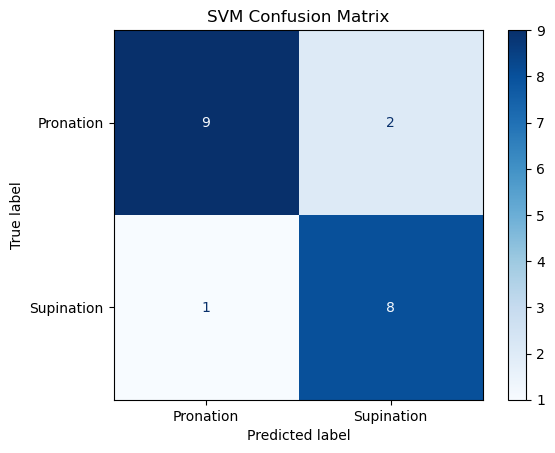


--- RF Evaluation ---
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



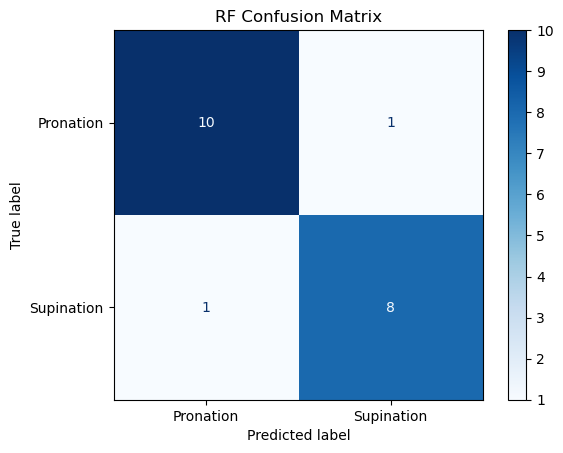

In [ ]:
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n--- {name} Evaluation ---")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pronation", "Supination"])
    disp.plot(cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [ ]:
#Option 2: Deep Learning

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, cross_val_score
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler


# Standardize data
scaler = StandardScaler()
n_epochs, n_channels, n_times = X.shape
X_reshaped = X.reshape(n_epochs, -1)
X_scaled = scaler.fit_transform(X_reshaped).reshape(n_epochs, n_channels, n_times)

# Prepare PyTorch datasets
torch_X = torch.tensor(X_scaled, dtype=torch.float32)
torch_y = torch.tensor(y, dtype=torch.long)
dataset = TensorDataset(torch_X, torch_y)
#dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False)

In [ ]:
# Define RNN model
class EEG_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(EEG_RNN, self).__init__()
        self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # reshape to (batch, time, channels)
        _, h_n = self.rnn(x)
        out = self.fc(h_n[-1])
        return out

In [ ]:
# Train model (generic trainer)
def train_model(model, trainloader, testloader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            outputs = model(batch_X)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(batch_y.numpy())

    print("\n--- Evaluation ---")
    print(classification_report(all_labels, all_preds))
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pronation", "Supination"])
    disp.plot(cmap="Purples")
    plt.title("Deep Learning Model Confusion Matrix")
    plt.show()



Training RNN...
Epoch 1/10, Loss: 3.5005
Epoch 2/10, Loss: 3.3841
Epoch 3/10, Loss: 3.2748
Epoch 4/10, Loss: 3.2167
Epoch 5/10, Loss: 3.1740
Epoch 6/10, Loss: 3.1145
Epoch 7/10, Loss: 3.0496
Epoch 8/10, Loss: 2.9802
Epoch 9/10, Loss: 2.9349
Epoch 10/10, Loss: 2.8417

--- Evaluation ---
              precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.33      0.11      0.17         9

    accuracy                           0.50        20
   macro avg       0.43      0.46      0.40        20
weighted avg       0.44      0.50      0.43        20



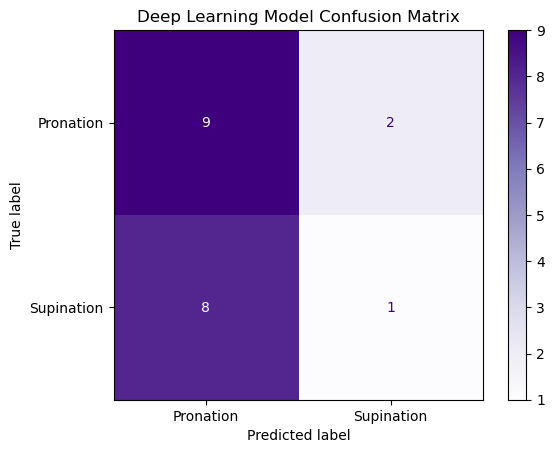

In [ ]:
# Initialize and train models
print("\nTraining RNN...")
rnn_model = EEG_RNN(input_size=n_channels, hidden_size=64, num_classes=2)
train_model(rnn_model, train_loader, test_loader)


In [ ]:
class EEG_Transformer(nn.Module):
    def __init__(self, input_size, num_classes):
        super(EEG_Transformer, self).__init__()
        self.input_size = input_size
        self.adjusted_dim = input_size if input_size % 4 == 0 else 4 * ((input_size // 4) + 1)
        self.proj = nn.Linear(in_features=self.input_size * n_times, out_features=self.adjusted_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=self.adjusted_dim, nhead=4, batch_first=True)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=2)
        self.fc = nn.Linear(self.adjusted_dim, num_classes)

    def forward(self, x):
        b, c, t = x.size()
        x = x.view(b, -1)
        x = self.proj(x).unsqueeze(1)  # [B, 1, adjusted_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)
        return self.fc(x)


Training Transformer...
Epoch 1/10, Loss: 5.6023
Epoch 2/10, Loss: 4.0180
Epoch 3/10, Loss: 3.8113
Epoch 4/10, Loss: 3.4409
Epoch 5/10, Loss: 3.3904
Epoch 6/10, Loss: 3.3243
Epoch 7/10, Loss: 3.3352
Epoch 8/10, Loss: 3.0631
Epoch 9/10, Loss: 2.8732
Epoch 10/10, Loss: 2.6057

--- Evaluation ---
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20



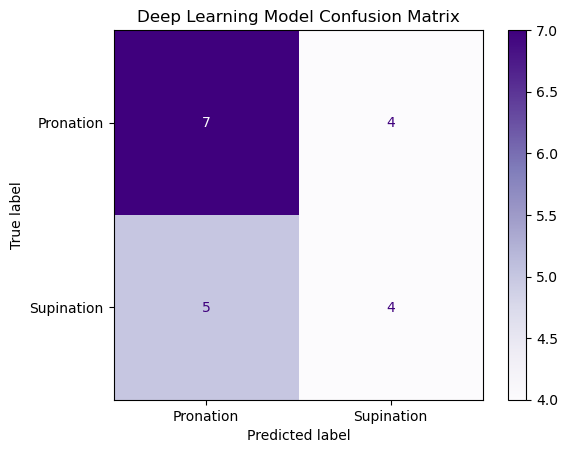

In [ ]:
print("\nTraining Transformer...")
transformer_model = EEG_Transformer(input_size=n_channels, num_classes=2)
train_model(transformer_model, train_loader, test_loader)